In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import dynadojo as dd
import numpy as np

2023-06-18 16:20:33.601320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


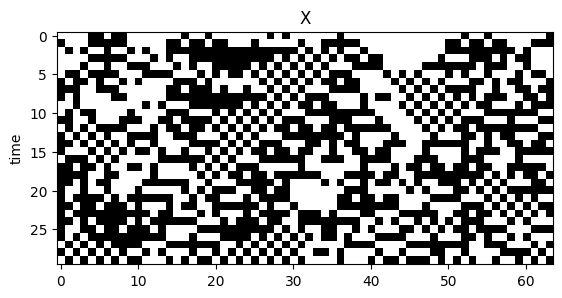

In [6]:
latent_dim = 3
embed_dim = 64
timesteps = 30
n = 1000
system = dd.systems.CASystem(latent_dim, embed_dim, mutation_p=0)
x0 = system.make_init_conds(n=n)
x = system.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
dd.utils.ca.plot([x], labels=["X"])

In [14]:
model = dd.baselines.CNN(embed_dim, timesteps, max_control_cost=0)
model.fit(x, epochs=1000)

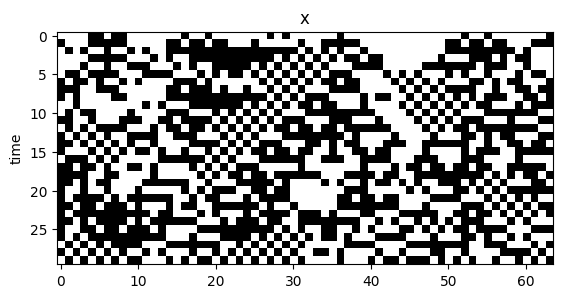

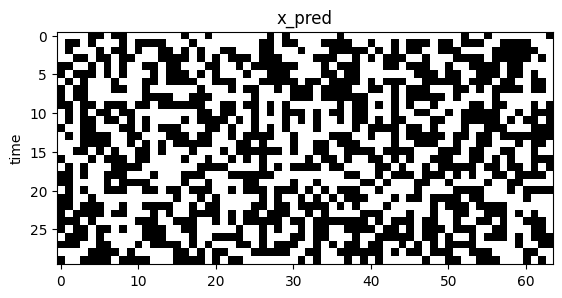

In [15]:
x_pred = model.predict(x0, timesteps=timesteps)
dd.utils.ca.plot([x, x_pred], labels=["x", "x_pred"])